<a href="https://colab.research.google.com/github/Naga-Aditya-Anand/Machine-Learning-Projects/blob/main/Alphabet-Recognition-CNN/AlphabetRecognition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Alphabet Recognition Using CNN

## Importing Libraries

In [33]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout,Conv2D,MaxPooling2D,Flatten
import tensorflow_datasets as tfds

In [34]:
import cv2

## Importing the Dataset

In [35]:
(dtrain,dtest),info = tfds.load('emnist/letters',split=['train','test'],with_info=True,as_supervised=True)

In [36]:
X_train,Y_train = [],[]
for image,label in tfds.as_numpy(dtrain):
  # Reshape the image to have 3 dimensions (height, width, channel)
  image = image.reshape(image.shape[0], image.shape[1], 1)
  img = tf.transpose(image, [1, 0, 2]) # Transpose with the channel dimension included
  X_train.append(img)
  Y_train.append(label)

X_test,Y_test = [],[]
for image,label in tfds.as_numpy(dtest):
  # Reshape the image to have 3 dimensions (height, width, channel)
  image = image.reshape(image.shape[0], image.shape[1], 1)
  img = tf.transpose(image, [1, 0, 2]) # Transpose with the channel dimension included
  X_test.append(img)
  Y_test.append(label)

In [37]:
X_train,Y_train = np.array(X_train),np.array(Y_train)
X_test,Y_test = np.array(X_test),np.array(Y_test)

In [38]:
X_train,X_test = X_train/255.0,X_test/255.0

In [39]:
X_train = X_train.reshape(X_train.shape[0],28,28,1)
X_test = X_test.reshape(X_test.shape[0],28,28,1)

In [40]:
Y_train = tf.keras.utils.to_categorical(Y_train-1,num_classes=26)
Y_test = tf.keras.utils.to_categorical(Y_test-1,num_classes=26)

## Creating the CNN Model

In [41]:
model = Sequential([
    Conv2D(64,(3,3),activation='relu',input_shape=(28,28,1)),
    MaxPooling2D((2,2)),
    Conv2D(128,(3,3),activation='relu'),
    MaxPooling2D((2,2)),
    Conv2D(256,(3,3),activation='relu'),
    MaxPooling2D((2,2)),
    Flatten(),
    Dense(256,activation='relu'),
    Dropout(0.5),
    Dense(26,activation='softmax')
])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [42]:
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),loss='categorical_crossentropy',metrics=['accuracy'])
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_3 (Conv2D)               │ (None, 26, 26, 64)     │           640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 13, 13, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 11, 11, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 5, 5, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 3, 3, 256)      │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 1, 1, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 256)            │        65,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 26)             │         6,682 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 442,138 (1.69 MB)

 Trainable params: 442,138 (1.69 MB)

 Non-trainable params: 0 (0.00 B)

## Training the Model

In [43]:
model.fit(X_train,Y_train,epochs=10,batch_size=16,validation_data=(X_test,Y_test))

Epoch 1/10
5550/5550 ━━━━━━━━━━━━━━━━━━━━ 314s 56ms/step - accuracy: 0.6656 - loss: 1.0787 - val_accuracy: 0.8674 - val_loss: 0.3832
Epoch 2/10
5550/5550 ━━━━━━━━━━━━━━━━━━━━ 308s 54ms/step - accuracy: 0.8786 - loss: 0.3705 - val_accuracy: 0.8811 - val_loss: 0.3432
Epoch 3/10
5550/5550 ━━━━━━━━━━━━━━━━━━━━ 296s 53ms/step - accuracy: 0.8981 - loss: 0.3068 - val_accuracy: 0.8842 - val_loss: 0.3419
Epoch 4/10
5550/5550 ━━━━━━━━━━━━━━━━━━━━ 307s 55ms/step - accuracy: 0.9095 - loss: 0.2609 - val_accuracy: 0.8943 - val_loss: 0.3114
Epoch 5/10
5550/5550 ━━━━━━━━━━━━━━━━━━━━ 312s 54ms/step - accuracy: 0.9156 - loss: 0.2381 - val_accuracy: 0.8834 - val_loss: 0.3561
Epoch 6/10
5550/5550 ━━━━━━━━━━━━━━━━━━━━ 319s 53ms/step - accuracy: 0.9239 - loss: 0.2166 - val_accuracy: 0.8983 - val_loss: 0.3144
Epoch 7/10
5550/5550 ━━━━━━━━━━━━━━━━━━━━ 327s 54ms/step - accuracy: 0.9259 - loss: 0.2029 - val_accuracy: 0.8847 - val_loss: 0.3601
Epoch 8/10
5550/5550 ━━━━━━━━━━━━━━━━━━━━ 329s 55ms/step - accuracy: 

In [44]:
test_loss,test_acc = model.evaluate(X_test,Y_test)
print(test_acc)

463/463 ━━━━━━━━━━━━━━━━━━━━ 12s 25ms/step - accuracy: 0.8956 - loss: 0.3608
0.8948648571968079


## Testing the Model on Test Cases

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
K


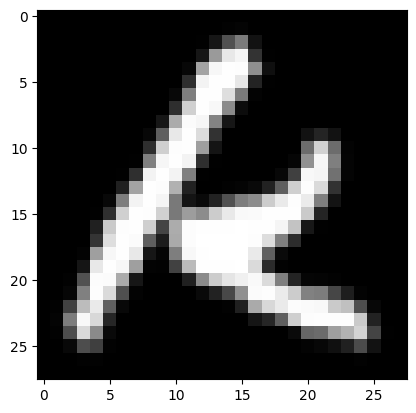

In [50]:
prediction = model.predict(X_test[200].reshape(1,28,28,1))
pred_label = np.argmax(prediction)
predicted_letter = chr(pred_label + ord('A'))
print(predicted_letter)

plt.imshow(X_test[200].squeeze(),cmap='gray')
plt.show()

## Testing the model on Real World Cases

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step
D


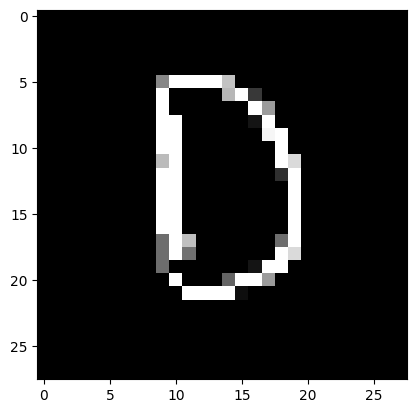

In [80]:
img = cv2.imread('d.png')
img = cv2.cvtColor(img,cv2.COLOR_RGB2GRAY)
img = cv2.bitwise_not(img)
_, thresh = cv2.threshold(img, 150, 255, cv2.THRESH_BINARY)
#thresh = cv2.adaptiveThreshold(img,255,cv2.ADAPTIVE_THRESH_GAUSSIAN_C,cv2.THRESH_BINARY,99,10)
img = cv2.resize(thresh,(28,28))
img = img/255.0
img = img.reshape(1,28,28,1)

prediction1 = model.predict(img)
pred_label1 = np.argmax(prediction1)
predicted_letter1 = chr(pred_label1+ord('A'))

print(predicted_letter1)

plt.imshow(img.squeeze(),cmap='gray')
plt.show()